In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.externals import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss

In [2]:
df = pd.read_csv("Contacts_Pre_2017.csv")

In [3]:
CI = df.loc[df['CONTACT.TYPE'] == 'Call - Input']
FI = df.loc[df['CONTACT.TYPE'] == 'Fax - Input']
FAI = df.loc[df['CONTACT.TYPE'] == 'Fax Acknowledgement - Input']
IR = df.loc[df['CONTACT.TYPE'] == 'Installation Report - Input']
IM = df.loc[df['CONTACT.TYPE'] == 'Internal Management']

In [6]:
CI = CI.reset_index()
#CI = CI.reset_index()
FI= FI.reset_index()

FAI= CI.reset_index()

IR= IR.reset_index()

IM= IM.reset_index()


ValueError: cannot insert level_0, already exists

In [7]:
X =  CI['level_0'].values
print X
y = CI['Contacts'].values

print y

[   0    1    2 ..., 3089 3090 3091]
[  84  236    1 ..., 2697 2517  231]


In [8]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf = svr_rbf.fit(X, y).predict(X)
print mean_squared_error(y, y_rbf)

2325796.56535


In [11]:
from statsmodels.tsa.arima_model import ARIMA

In [12]:
df.head()

,START.DATE,END.DATE,CONTACT.TYPE,Contacts
0,2010-01-01,2010-01-01,Call - Input,84
1,2010-01-01,2010-01-01,Web - Input,11
2,2010-01-02,2010-01-02,Call - Input,236
3,2010-01-02,2010-01-02,Web - Input,21
4,2010-01-02,2010-01-03,Call - Input,1


In [16]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d');
data = pd.read_csv('Contacts_Pre_2017.csv', index_col='START.DATE')

In [17]:
data.head()

,END.DATE,CONTACT.TYPE,Contacts
START.DATE,,,
2010-01-01,2010-01-01,Call - Input,84
2010-01-01,2010-01-01,Web - Input,11
2010-01-02,2010-01-02,Call - Input,236
2010-01-02,2010-01-02,Web - Input,21
2010-01-02,2010-01-03,Call - Input,1


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17312 entries, 2010-01-01 to 2016-12-31
Data columns (total 3 columns):
END.DATE        17312 non-null object
CONTACT.TYPE    17312 non-null object
Contacts        17312 non-null int64
dtypes: int64(1), object(2)
memory usage: 541.0+ KB


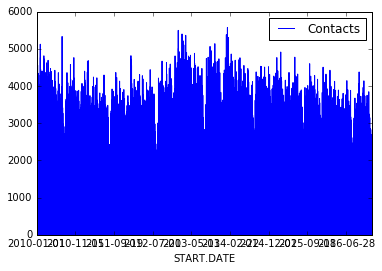

In [25]:
data.plot()
plt.show()

In [26]:
data.index

Index([u'2010-01-01', u'2010-01-01', u'2010-01-02', u'2010-01-02',
       u'2010-01-02', u'2010-01-03', u'2010-01-03', u'2010-01-03',
       u'2010-01-04', u'2010-01-04',
       ...
       u'2016-12-30', u'2016-12-30', u'2016-12-30', u'2016-12-30',
       u'2016-12-30', u'2016-12-30', u'2016-12-31', u'2016-12-31',
       u'2016-12-31', u'2016-12-31'],
      dtype='object', name=u'START.DATE', length=17312)

In [37]:
model = ARIMA(int(X), order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(y)
plt.plot(results_AR.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

TypeError: only length-1 arrays can be converted to Python scalars